In [141]:
%matplotlib inline

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [69]:
ge = pd.read_csv('data/election-data-2004-2018.csv')

In [70]:
ge.head(3)

,year,state,seat_code_no,seat_code,seat_name,candidate,party,coalition,winlose,is_uncontested,votes,majority,margin,voteshare,total_eligible,total_voted,total_majority,votes_spoilt,race_malay,race_chinese,race_indian,race_others,race_bumi_east_msia,data_errors
0,2004,Perlis,1,P1,Padang Besar,Datuk Seri Azmi Khalid,UMNO,BN,1,0,18322,9264,0.338349,0.669175,33899,27380,9264,672,0.84,0.11,0.01,0.03,0.0,NaN
1,2004,Perlis,1,P1,Padang Besar,Wan Kharizal Wan Khazim,PAS,Pakatan,0,0,9058,-9264,-0.338349,0.330825,33899,27380,9264,672,0.84,0.11,0.01,0.03,0.0,NaN
2,2004,Perlis,2,P2,Kangar,Datuk Radzi Sheikh Ahmad,UMNO,BN,1,0,22498,12548,0.386711,0.693356,40516,32448,12548,548,0.79,0.18,0.02,0.01,0.0,NaN


In [71]:
cols_simple = ['year', 'state', 'seat_code', 'seat_name', 'candidate', 'party', 'coalition', 'winlose']

## Exploration

### No coalition

Peaked in 2013, but no winners outside Sabah/Sarawak.

In [135]:
no_coalition = ge[ge["coalition"].isnull()]
no_coalition.pivot_table(values="candidate", index="year", aggfunc="count")

,candidate
year,
2004,43
2008,50
2013,139
2018,61


In [130]:
no_coalition.pivot_table(values="candidate", index=["year", "state"], aggfunc="count"
).sort_values(["year", "candidate"], ascending=[True, False])

candidate
year state                     
2004 Sarawak                 22
     Sabah                   17
     WP Kuala Lumpur          2
     Kelantan                 1
     Selangor                 1
2008 Sabah                   19
     Sarawak                 19
     Kelantan                 2
     Perak                    2
     Selangor                 2
     Johor                    1
     Negeri Sembilan          1
     Penang                   1
     Terengganu               1
     WP Kuala Lumpur          1
     WP Labuan                1
2013 Sabah                   45
     Sarawak                 24
     Selangor                20
     Kedah                    9
     Perak                    8
     Pahang                   7
     WP Kuala Lumpur          7
     Penang                   6
     Negeri Sembilan          5
     Kelantan                 3
     Johor                    2
     Terengganu               2
     Perlis                   1
2018 Sabah                   34
     Sarawak                  7
     Penang                   6
     Selangor                 6
     Perak                    2
     WP Kuala Lumpur          2
     Kedah                    1
     Negeri Sembilan          1
     Pahang                   1
     WP Labuan                1

In [125]:
no_coalition_winners = ge[ge["coalition"].isnull() & ge["winlose"] == 1]
no_coalition_winners.pivot_table(values="candidate", index=["year", "state"], aggfunc="count")

,year,state,seat_code,seat_name,candidate,party,coalition,winlose
382,2004,Sabah,P186,Sandakan,Chong Hon Min,IND,NaN,1
393,2004,Sarawak,P192,Mas Gading,Tekhee@Tiki Ak Lafe,SPDP,NaN,1
417,2004,Sarawak,P205,Saratok,Jelaing Mersat,SPDP,NaN,1
439,2004,Sarawak,P217,Bintulu,Datuk Seri Tiong King Sing,SPDP,NaN,1
443,2004,Sarawak,P220,Baram,Datuk Jacob Dungau Sagan,SPDP,NaN,1
858,2008,Sarawak,P192,Mas Gading,Datuk Dr Tiki Lafe,SPDP,NaN,1
889,2008,Sarawak,P205,Saratok,Jelaing Mersat,SPDP,NaN,1
912,2008,Sarawak,P217,Bintulu,Datuk Seri Tiong King Sing,SPDP,NaN,1
918,2008,Sarawak,P220,Baram,Datuk Jacob Dungau Sagan,SPDP,NaN,1
1421,2013,Sarawak,P192,Mas Gading,Nogeh Anak Gumbek,SPDP,NaN,1


In [126]:
no_coalition_winners[cols_simple]

candidate
year state             
2004 Sabah            1
     Sarawak          4
2008 Sarawak          4
2013 Sarawak          4
2018 Sabah            1

### Uncontested seats

Only Johor/Sabah/Sarawak 2004/2008.

In [134]:
uncontested = ge[ge["is_uncontested"] == 1]
uncontested.pivot_table(values="candidate", index=["year", "state"], aggfunc="count")

candidate
year state             
2004 Johor            2
     Sabah            7
     Sarawak          5
2008 Johor            1
     Sabah            2
     Sarawak          6

In [133]:
uncontested[cols_simple]

,year,state,seat_code,seat_name,candidate,party,coalition,winlose
319,2004,Johor,P156,Kota Tinggi,Datuk Syed Hamid Albar,UMNO,BN,1
320,2004,Johor,P157,Pengerang,Datuk Azalina Othman Said,UMNO,BN,1
360,2004,Sabah,P175,Papar,Rosnah Abdul Abdul Rashid Shirlin,UMNO,BN,1
363,2004,Sabah,P177,Beaufort,Azizah Mohd Dun,UMNO,BN,1
364,2004,Sabah,P178,Sipitang,Datuk Dr Yusof Yacob,UMNO,BN,1
376,2004,Sabah,P183,Beluran,Ronald Kiandee,UMNO,BN,1
384,2004,Sabah,P187,Kinabatangan,Bung Mokthar Radin,UMNO,BN,1
391,2004,Sabah,P190,Tawau,Shim Paw Fatt,SAPP,BN,1
392,2004,Sabah,P191,Kalabakan,Abdul Ghapur Salleh,UMNO,BN,1
403,2004,Sarawak,P197,Kota Samarahan,Abdul Taib Mahmud,PBB,BN,1


### Data errors

Only Sabah/Sarawak 2004/2008.

In [136]:
data_errors = ge[~ge["data_errors"].isnull()]
data_errors[list([*cols_simple, 'data_errors'])]

,year,state,seat_code,seat_name,candidate,party,coalition,winlose,data_errors
393,2004,Sarawak,P192,Mas Gading,Tekhee@Tiki Ak Lafe,SPDP,NaN,1,Race data incomplete or unavailable.
394,2004,Sarawak,P192,Mas Gading,Dr Patau Rubis,SNAP,NaN,0,Race data incomplete or unavailable.
395,2004,Sarawak,P193,Santubong,Datuk Wan Junaidi Tuanku Jaafar,PBB,BN,1,Race data incomplete or unavailable.
396,2004,Sarawak,P193,Santubong,Idris Bin Bohari,IND,NaN,0,Race data incomplete or unavailable.
397,2004,Sarawak,P194,Petra Jaya,Fadillah Yusof,PBB,BN,1,Race data incomplete or unavailable.
398,2004,Sarawak,P194,Petra Jaya,Wan Zainal Abidin Wan Senusi,PKR,Pakatan,0,Race data incomplete or unavailable.
403,2004,Sarawak,P197,Kota Samarahan,Abdul Taib Mahmud,PBB,BN,1,Race data incomplete or unavailable.
404,2004,Sarawak,P198,Mambong,Dr James Dawos Mamit,PBB,BN,1,Race data incomplete or unavailable.
405,2004,Sarawak,P198,Mambong,Mangan Ngandok,STAR,NaN,0,Race data incomplete or unavailable.
406,2004,Sarawak,P199,Serian,Richard Riot Jaem,SUPP,BN,1,Race data incomplete or unavailable.


### Extra win in 2008 (UPDATE TO DATAFRAME)

Winner is Bung Moktar Radin, Ricky Jikah's win is mistakenly recorded.

In [138]:
ge.pivot_table(values="winlose", index="year", aggfunc="sum")

,winlose
year,
2004,218
2008,223
2013,222
2018,222


In [150]:
ge[ge["year"] == 2008].pivot_table(values="winlose", index="seat_code", aggfunc="sum"
).sort_values("winlose", ascending=False)[:1]

,winlose
seat_code,
P187,2


In [152]:
ge[(ge["year"] == 2008) & (ge["seat_code"] == "P187")]

,year,state,seat_code_no,seat_code,seat_name,candidate,party,coalition,winlose,is_uncontested,votes,majority,margin,voteshare,total_eligible,total_voted,total_majority,votes_spoilt,race_malay,race_chinese,race_indian,race_others,race_bumi_east_msia,data_errors
847,2008,Sabah,187,P187,Kinabatangan,Datuk Bung Moktar Radin,UMNO,BN,1,0,8507,6326,0.518397,0.697124,19554,12203,6326,589,0.0,0.01,0.0,0.0,0.98,NaN
848,2008,Sabah,187,P187,Kinabatangan,Ahmad Abdul,PKR,Pakatan,0,0,2181,666,-0.518397,0.178727,19554,12203,6326,589,0.0,0.01,0.0,0.0,0.98,NaN
849,2008,Sabah,187,P187,Kinabatangan,Dasim @ Ricky Jikah,UMNO,BN,1,0,1515,6326,0.518397,0.124150,19554,12203,6326,589,0.0,0.01,0.0,0.0,0.98,NaN


In [155]:
ge.at[849, "winlose"] = 0

In [156]:
ge.pivot_table(values="winlose", index="year", aggfunc="sum")

,winlose
year,
2004,218
2008,222
2013,222
2018,222


## Plots

### All competing candidates, by year

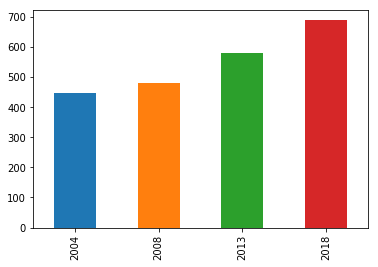

In [30]:
_ = ge["year"].value_counts().sort_index().plot.bar()

### Competing candidates by coalition, by year

### Competing candidates by party, by year

### Total eligible voters, by year

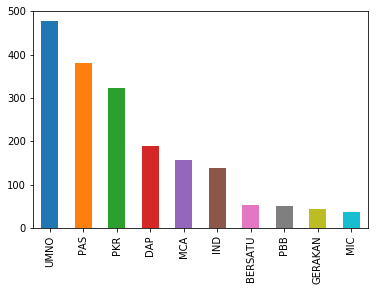

In [25]:
_ = ge["party"].value_counts().head(10).plot.bar()

In [17]:
ge_2004 = ge[ge["year"] == 2004]
ge_2008 = ge[ge["year"] == 2008]
ge_2013 = ge[ge["year"] == 2013]
ge_2018 = ge[ge["year"] == 2018]

In [5]:
for year in ge["year"].unique():
    ge_year = ge[ge["year"] == year]
    print(f"{len(ge_year['seat_code'].unique())} seats contested in {year}")

218 seats contested in 2004
222 seats contested in 2008
222 seats contested in 2013
222 seats contested in 2018


In [8]:
ge_2018 = ge[ge["year"] == 2018]

In [10]:
ge_2018_codes = ge_2018["seat_code"].unique()
ge_2018_seats = ge_2018["seat_name"].unique()

In [11]:
for year in ge["year"].unique()[:-1]:
    ge_year = ge[ge["year"] == year]
    ge_year_codes = ge_year["seat_code"].unique()
    ge_year_seats = ge_year["seat_name"].unique()
    
    in_year_only = ge_year_seats[~np.isin(ge_year_seats, ge_2018_seats)]
    in_2018_only = ge_2018_seats[~np.isin(ge_2018_seats, ge_year_seats)]
    
    in_year_codes_only = ge_year_codes[~np.isin(ge_year_codes, ge_2018_codes)]
    in_2018_codes_only = ge_2018_codes[~np.isin(ge_2018_codes, ge_year_codes)]
    
    print(year)
    print(f"Seats existing in {year} that did not exist in 2018:") 
    print(f"{', '.join(in_year_only)}\n({len(in_year_only)} seats)")
    print(f"Seats existing in 2018 that did not exist in {year}:") 
    print(f"{', '.join(in_2018_only)}\n({len(in_2018_only)} seats)")
    print(f"Codes existing in {year} that did not exist in 2018:") 
    print(f"{', '.join(in_year_codes_only)}\n({len(in_year_codes_only)} codes)")
    print(f"Codes existing in 2018 that did not exist in {year}:") 
    print(f"{', '.join(in_2018_codes_only)}\n({len(in_2018_codes_only)} codes)\n\n")

2004
Seats existing in 2004 that did not exist in 2018:
Kulim Bandar Baharu, Kota Bahru, Grik, Bagan Datok, Telok Intan, Ulu Selangor, Serdang, Kelana Jaya, PJ Selatan, PJ Utara, Teluk Kemang, Bukit Katil, Gelang Patah, Mambong, Kuala Rajang
(15 seats)
Seats existing in 2018 that did not exist in 2004:
Kulim-Bandar Baharu, Kota Bharu, Gerik, Bagan Datuk, Teluk Intan, Hulu Selangor, Bangi, Petaling Jaya , Damansara, Sungai Buloh, Port Dickson, Hang Tuah Jaya, Iskandar Puteri, Puncak Borneo, Tanjong Manis, Igan, Sibuti, Limbang, Lawas
(19 seats)
Codes existing in 2004 that did not exist in 2018:

(0 codes)
Codes existing in 2018 that did not exist in 2004:
P207, P218, P221, P222
(4 codes)


2008
Seats existing in 2008 that did not exist in 2018:
Kulim Bandar Baharu, Kota Bahru, Grik, Bagan Datok, Telok Intan, Ulu Selangor, Serdang, Kelana Jaya, PJ Selatan, PJ Utara, Teluk Kemang, Bukit Katil, Gelang Patah, Mambong, Kuala Rajang
(15 seats)
Seats existing in 2018 that did not exist in 2008

Candidates from each party Y/Y?

Number of contestants per seat Y/Y?

Win percentage for each coalition Y/Y?

1. Get only results from GE14
2. Get only winners
3. Create winner JSONs for each party

In [5]:
for year in ge["year"].unique():
    ge_year = ge[ge["year"] == year]
    parties = ge_year["party"].unique()
    print("Competing parties in year {}:\n{}\n".format(year, ", ".join(parties)))

Competing parties in year 2004:
UMNO, PAS, MCA, PKR, Ind, DAP, GERAKAN, PPP, MIC, MDP, IND, PBS, SETIA, UPKO, SAPP, PBRS, LDP, PASOK, SPDP, SNAP, PBB, SUPP, STAR, PBDS

Competing parties in year 2008:
UMNO, PAS, PKR, MCA, IND, DAP, GERAKAN, PPP, MIC, PRM, PBS, BERSEKUTU, UPKO, SAPP, PASOK, PBRS, LDP, SPDP, SNAP, PBB, SUPP, PRS

Competing parties in year 2013:
PAS, UMNO, IND, PKR, MCA, BERJASA, BERSAMA, KITA, DAP, PCM, MIC, GERAKAN, PPP, SAPP, STAR, PBS, UPKO, PBRS, LDP, SPDP, PBB, SUPP, PRS, SWP

Competing parties in year 2018:
UMNO, BERSATU, PAS, PKR, AMANAH, MCA, BEBAS, PRM, DAP, PCM, MU, GERAKAN, PFP, MIC, PSM, BERJASA, IKATAN, MYPPP, PAP, WARISAN, HR, PPRS, PBS, PCS, UPKO, SAPP, ANAKNEGERI, STAR, PBRS, LDP, PDP, PBB, SUPP, PRS, PBDSB, PBK, PEACE



In [6]:
ge14_seats_won = ge14[ge14["winlose"] == 1]

In [7]:
ge14_seats_bn = ge14_seats_won[ge14_seats_won["coalition"] == "BN"]
ge14_seats_ph = ge14_seats_won[ge14_seats_won["coalition"] == "Pakatan"]
ge14_seats_gs = ge14_seats_won[ge14_seats_won["coalition"] == "PAS"]

In [8]:
ge13_seats_won = ge13[ge13["winlose"] == 1]
ge13_seats_bn = ge13_seats_won[ge13_seats_won["coalition"] == "BN"]
ge13_seats_ph = ge13_seats_won[ge13_seats_won["coalition"] == "Pakatan"]
ge13_seats_gs = ge13_seats_won[ge13_seats_won["coalition"] == "PAS"]

ge12_seats_won = ge12[ge12["winlose"] == 1]
ge12_seats_bn  = ge12_seats_won[ge12_seats_won["coalition"] == "BN"]
ge12_seats_ph  = ge12_seats_won[ge12_seats_won["coalition"] == "Pakatan"]
ge12_seats_gs  = ge12_seats_won[ge12_seats_won["coalition"] == "PAS"]

ge11_seats_won = ge11[ge11["winlose"] == 1]
ge11_seats_bn  = ge11_seats_won[ge11_seats_won["coalition"] == "BN"]
ge11_seats_ph  = ge11_seats_won[ge11_seats_won["coalition"] == "Pakatan"]
ge11_seats_gs  = ge11_seats_won[ge11_seats_won["coalition"] == "PAS"]

In [10]:
ge14_geo = gpd.read_file("data/parliamentary-boundaries-2018-working.geojson")

In [11]:
ge14_geo.head()

,KodPAR,Parliament,State,geometry
0,054,GERIK,PERAK,(POLYGON ((100.9933944673964 5.507324842759963...
1,055,LENGGONG,PERAK,(POLYGON ((100.9293339657613 5.514131158215433...
2,056,LARUT,PERAK,(POLYGON ((100.8672078753412 5.428777928590932...
3,058,BAGAN SERAI,PERAK,(POLYGON ((100.6241018705403 5.141014699246791...
4,057,PARIT BUNTAR,PERAK,(POLYGON ((100.4127561987131 4.992960828699954...


In [12]:
ge14_geo["KodPAR"] = pd.to_numeric(ge14_geo["KodPAR"])

In [13]:
ge14_geo_bn = ge14_geo[ge14_geo["KodPAR"].isin(ge14_seats_bn["seat_code_no"])]
ge14_geo_ph = ge14_geo[ge14_geo["KodPAR"].isin(ge14_seats_ph["seat_code_no"])]
ge14_geo_gs = ge14_geo[ge14_geo["KodPAR"].isin(ge14_seats_gs["seat_code_no"])]

In [14]:
ge14_geo_bn.head()

,KodPAR,Parliament,State,geometry
0,54,GERIK,PERAK,(POLYGON ((100.9933944673964 5.507324842759963...
1,55,LENGGONG,PERAK,(POLYGON ((100.9293339657613 5.514131158215433...
2,56,LARUT,PERAK,(POLYGON ((100.8672078753412 5.428777928590932...
3,58,BAGAN SERAI,PERAK,(POLYGON ((100.6241018705403 5.141014699246791...
6,61,PADANG RENGAS,PERAK,"(POLYGON ((100.8067462782922 4.85724527156128,..."


In [15]:
ge13_geo_bn = ge14_geo[ge14_geo["KodPAR"].isin(ge13_seats_bn["seat_code_no"])]
ge13_geo_ph = ge14_geo[ge14_geo["KodPAR"].isin(ge13_seats_ph["seat_code_no"])]
ge13_geo_gs = ge14_geo[ge14_geo["KodPAR"].isin(ge13_seats_gs["seat_code_no"])]

ge12_geo_bn = ge14_geo[ge14_geo["KodPAR"].isin(ge12_seats_bn["seat_code_no"])]
ge12_geo_ph = ge14_geo[ge14_geo["KodPAR"].isin(ge12_seats_ph["seat_code_no"])]
ge12_geo_gs = ge14_geo[ge14_geo["KodPAR"].isin(ge12_seats_gs["seat_code_no"])]

ge11_geo_bn = ge14_geo[ge14_geo["KodPAR"].isin(ge11_seats_bn["seat_code_no"])]
ge11_geo_ph = ge14_geo[ge14_geo["KodPAR"].isin(ge11_seats_ph["seat_code_no"])]
ge11_geo_gs = ge14_geo[ge14_geo["KodPAR"].isin(ge11_seats_gs["seat_code_no"])]

In [16]:
with open ("data/ge14-geo-bn.geojson", "w") as f:
    f.write(ge14_geo_bn.to_json())
    
with open ("data/ge14-geo-ph.geojson", "w") as f:
    f.write(ge14_geo_ph.to_json())
    
with open ("data/ge14-geo-gs.geojson", "w") as f:
    f.write(ge14_geo_gs.to_json())
    
with open ("data/ge13-geo-bn.geojson", "w") as f:
    f.write(ge13_geo_bn.to_json())
    
with open ("data/ge13-geo-ph.geojson", "w") as f:
    f.write(ge13_geo_ph.to_json())
    
with open ("data/ge13-geo-gs.geojson", "w") as f:
    f.write(ge13_geo_gs.to_json())
    
with open ("data/ge12-geo-bn.geojson", "w") as f:
    f.write(ge12_geo_bn.to_json())
    
with open ("data/ge12-geo-ph.geojson", "w") as f:
    f.write(ge12_geo_ph.to_json())
    
with open ("data/ge12-geo-gs.geojson", "w") as f:
    f.write(ge12_geo_gs.to_json())
    
with open ("data/ge11-geo-bn.geojson", "w") as f:
    f.write(ge11_geo_bn.to_json())
    
with open ("data/ge11-geo-ph.geojson", "w") as f:
    f.write(ge11_geo_ph.to_json())
    
with open ("data/ge11-geo-gs.geojson", "w") as f:
    f.write(ge11_geo_gs.to_json())